# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



#### 0 - Preprocessing
*This is just taken from our Assignment 2 with some minor tweaks.*

In [68]:
import pandas as pd
import sklearn as sk

In [69]:

# Remapping of column names for the TV2 and DR questions
tv2_original_columns = ['1a','1b','2a','2b','3a','3b','4a',
                        '4b','5a','5b','6a','6b','7a','7b','8a','8b',
                        '9a','9b','10a','10b','11a','11b','12a','12b']

tv2_new_columns = ['TV2-1a','TV2-1b','TV2-2a','TV2-2b','TV2-3a','TV2-3b','TV2-4a','TV2-4b',
                    'TV2-5a','TV2-5b','TV2-6a','TV2-6b','TV2-7a','TV2-7b','TV2-8a','TV2-8b',
                    'TV2-9a','TV2-9b','TV2-10a','TV2-10b','TV2-11a','TV2-11b','TV2-12a','TV2-12b']

dr_orignal_columns = ['530','531','533','534','535','537','538','540',
                    '541','543','544','545','546','547','548','550',
                    '551','552','553','555','556','557','559','561','563']
    
dr_new_columns =  ['DR-1','DR-2','DR-3','DR-4','DR-5','DR-6','DR-7','DR-8','DR-9',
                    'DR-10','DR-11','DR-12','DR-13','DR-14','DR-15','DR-16','DR-17',
                    'DR-18','DR-19','DR-20','DR-21','DR-22','DR-23','DR-24','DR-25']

# - Remapping for other columns
other_columns_original = ['navn','alder','parti','storkreds']

other_columns_new = ['Name','Age','Party','District']

# Dictionary for finding the orginal name of a column
column_name_dict = {}
column_name_dict.update(dict(zip(tv2_new_columns,tv2_original_columns)))
column_name_dict.update(dict(zip(dr_new_columns,dr_orignal_columns)))


**Utility Functions**

In [70]:
# Utility function - Rename the columns to be more descriptive
def rename_columns(data : pd.DataFrame) -> pd.DataFrame:

    # ? Remapping the column names for TV2
    data.rename(columns=dict(zip(tv2_original_columns, tv2_new_columns)), inplace=True)
    # ? Remapping the column names for DR
    data.rename(columns=dict(zip(dr_orignal_columns, dr_new_columns)), inplace=True)
    # ? Remapping the column names for the other columns
    data.rename(columns=dict(zip(other_columns_original, other_columns_new)), inplace=True)
    return data

# Utility function - Set the column order to be more intuitive
def reorder_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Reordering the columns
    # So the columns are easier to understand and work with.
    strict_column_order = ['Name','Age','Party','District'];
    remaining_columns = [col for col in data.columns if col not in strict_column_order]
    data = data[strict_column_order + remaining_columns]
    return data

**Load data from '00 - Data' folder**

In [71]:
# - Load the raw data from the file 'alldata.xlsx' into a pandas dataframe.
raw_data = pd.read_excel('00 - Data/alldata.xlsx')

# ! Renaming the columns
clean_data = rename_columns(raw_data)

# ! Reordering the columns
clean_data = reorder_columns(raw_data)

# ? Cleaning party names
clean_data['Party'] = clean_data['Party'].replace('Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Frie Grønne')


# * Preview the cleaned DataFrame
preview_dataFrame = clean_data.head(5)
preview_dataFrame = preview_dataFrame.style.set_caption('Preview of the cleaned DataFrame.')
preview_dataFrame = preview_dataFrame.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
preview_dataFrame = preview_dataFrame.set_properties(**{'text-align': 'center'})

display(preview_dataFrame.hide())

Name,Age,Party,District,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,DR-11,DR-12,DR-13,DR-14,DR-15,DR-16,DR-17,DR-18,DR-19,DR-20,DR-21,DR-22,DR-23,DR-24,DR-25,TV2-1a,TV2-1b,TV2-2a,TV2-2b,TV2-3a,TV2-3b,TV2-4a,TV2-4b,TV2-5a,TV2-5b,TV2-6a,TV2-6b,TV2-7a,TV2-7b,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
Lars Philipsen Prahm,78,Moderaterne,Københavns Storkreds,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1
Karsten Hønge,64,Socialistisk Folkeparti,Fyns Storkreds,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0
Martin Kelleher-Petersen,37,Alternativet,Bornholms Storkreds,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2
Nicklas Gjedsig Larsen,28,Alternativet,Nordjyllands Storkreds,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0
Tom Gillesberg,58,Løsgænger,Københavns Storkreds,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2


In [72]:

# - Load questions from 'drq.xlsx' and 'tv2q.xlsx' into a pandas dataframe.
dr_questions = pd.read_excel('00 - Data/drq.xlsx')

#  ! Format the 'ID' column to be a string
dr_questions['ID'] = dr_questions['ID'].astype(str)

# * Rename 'Title' to 'Area', 'ID' to 'Id'
dr_questions.rename(columns={'Title':'Subject','ID':'Id'}, inplace=True)

tv2_questions = pd.read_excel('00 - Data/tv2q.xlsx')

# * Rename 'id' to 'Id', 'question' to 'Question', 'header' to 'Area'
tv2_questions.rename(columns={'id':'Id', 'question':'Question', 'header':'Subject'}, inplace=True)

# ? Combine the two question dataframes
questions = pd.concat([dr_questions, tv2_questions], ignore_index=True)
questions = questions[['Id','Subject','Question']]

# * Preview the questions DataFrame
preview_questions = questions.head(5)
preview_questions = preview_questions.style.set_caption('Preview of the questions DataFrame.')
preview_questions = preview_questions.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
preview_questions = preview_questions.set_properties(**{'text-align': 'center'})

# - Display the preview of the questions DataFrame
display(preview_questions.hide())



Id,Subject,Question
530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje
531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhøjeste indkomster
533,RET OG STRAF,Kriminalitet begået i udsatte boligområder skal straffes særligt hårdt
534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU
535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret"


## YOUR TASK

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

### ANALYSIS
TODO: Using PCA to find the most important questions.

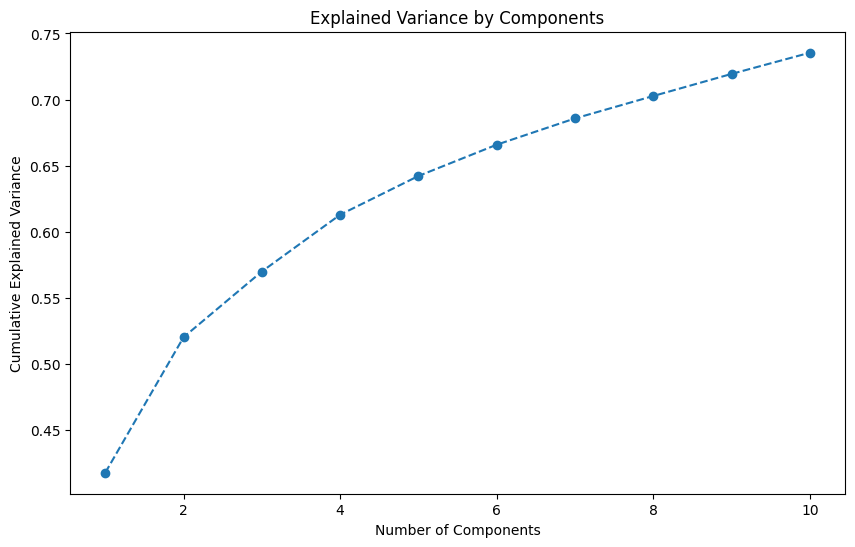

array([0.41737636, 0.10259865, 0.04976012, 0.04300926, 0.02932262,
       0.0237019 , 0.01991064, 0.01696817, 0.01672865, 0.0160607 ])

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'clean_data' is your DataFrame
# First, let's check if all columns to be dropped are present in the DataFrame
drop_columns = ['Name', 'Age', 'Party', 'District']
for col in drop_columns:
    if col not in clean_data.columns:
        raise ValueError(f"Column {col} not found in DataFrame.")

# Standardize the data excluding non-numeric or identifier columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clean_data.drop(drop_columns, axis=1))

# Apply PCA
pca = PCA(n_components=10)  # You can adjust this based on the scree plot outcome
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# - Show the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

display(explained_variance_ratio)

# Analyze loadings for the first few components
loadings = pd.DataFrame(pca.components_, columns=clean_data.drop(drop_columns, axis=1).columns)

**VISUALIZATION FOR THE QUESTION USING THE PCA COMPONENTS**

C:\Users\madsh\AppData\Local\Temp\ipykernel_26440\683208090.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (component_1[i], component_2[i]))  # Annotate each point with variable name


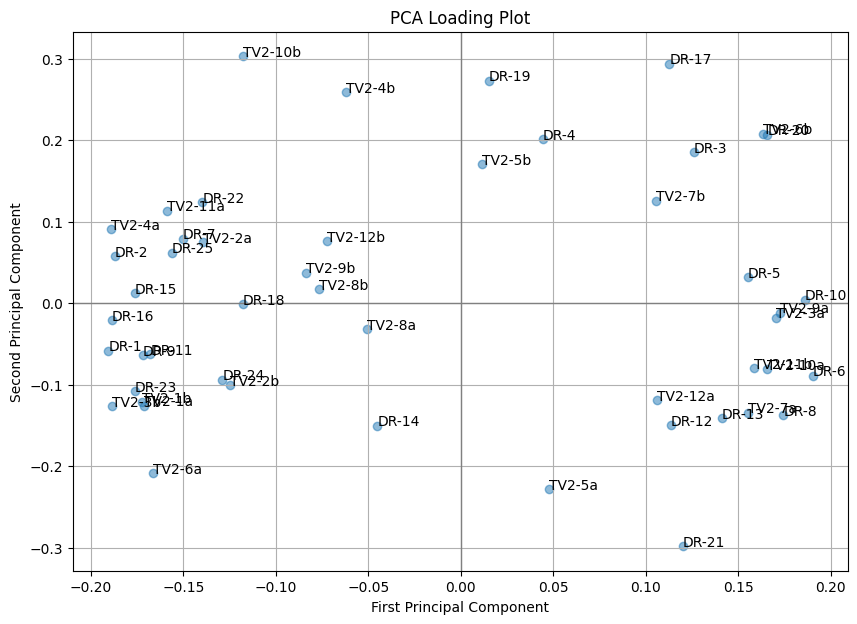

In [74]:
import matplotlib.pyplot as plt

# Correcting how we access the data for the first two components
component_1 = loadings.iloc[0]  # First principal component loadings
component_2 = loadings.iloc[1]  # Second principal component loadings

plt.figure(figsize=(10, 7))
plt.scatter(component_1, component_2, alpha=0.5)  # Plot loadings for first two components
for i, txt in enumerate(loadings.columns):
    plt.annotate(txt, (component_1[i], component_2[i]))  # Annotate each point with variable name
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Loading Plot')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.show()


**FINDING THE MOST CRUCIAL QUESTIONS FOR THE FIRST TWO COMPONENTS FROM PCA**

In [75]:
# Convert loadings to absolute values to consider both positive and negative contributions
absolute_loadings = loadings.abs()

# Focus on the first principal component or the first few if you want a broader analysis
sorted_loadings_first = loadings.iloc[0].sort_values(key=abs, ascending=False)
sorted_loadings_second = loadings.iloc[1].sort_values(key=abs, ascending=False)

# Create DataFrame with the columns: 'Question', 'Loading', 'Absolute Loading' for each component
crucial_questions_first_component = pd.DataFrame({
    'Question': sorted_loadings_first.index,
    'Loading': sorted_loadings_first.values,
    'Absolute Loading': sorted_loadings_first.abs().values
})

crucial_questions_second_component = pd.DataFrame({
    'Question': sorted_loadings_second.index,
    'Loading': sorted_loadings_second.values,
    'Absolute Loading': sorted_loadings_second.abs().values
})

# Print the most crucial questions for the first two components
print("Most crucial questions for the first principal component:")
print(crucial_questions_first_component.head(10))  # Adjust number as needed

print("\nMost crucial questions for the second principal component:")
print(crucial_questions_second_component.head(10))  # Adjust number as needed


Most crucial questions for the first principal component:
  Question   Loading  Absolute Loading
0     DR-1 -0.190641          0.190641
1     DR-6  0.190284          0.190284
2   TV2-4a -0.188849          0.188849
3   TV2-3b -0.188778          0.188778
4    DR-16 -0.188555          0.188555
5     DR-2 -0.187016          0.187016
6    DR-10  0.185893          0.185893
7    DR-15 -0.176281          0.176281
8    DR-23 -0.176279          0.176279
9     DR-8  0.174404          0.174404

Most crucial questions for the second principal component:
  Question   Loading  Absolute Loading
0  TV2-10b  0.302918          0.302918
1    DR-21 -0.297979          0.297979
2    DR-17  0.293836          0.293836
3    DR-19  0.272806          0.272806
4   TV2-4b  0.258449          0.258449
5   TV2-5a -0.228293          0.228293
6   TV2-6a -0.208142          0.208142
7   TV2-6b  0.207709          0.207709
8    DR-20  0.206750          0.206750
9     DR-4  0.201448          0.201448


**REPORT ON FINDINGS FOR THE TWO COMPONENTS AND ESTABLISH THE AXES FOR THE FINAL VISUALIZATION.**

PCA1 - Seems to be based primarily on Economical questions

PCA2 - Seems to be based primarily on Social-flavored questions (And a tiny bit of economics.)

In [84]:
# Find and display the most crucial questions from the first two components
most_crucial_first = crucial_questions_first_component['Question'].head(10).tolist()
most_crucial_second = crucial_questions_second_component['Question'].head(10).tolist()

# Show the most crucial questions for the first two components
most_crucial_first_original = [column_name_dict.get(q, q) for q in most_crucial_first]
most_crucial_second_original = [column_name_dict.get(q, q) for q in most_crucial_second]

most_crucial_first_df = questions[questions['Id'].isin(most_crucial_first_original)]
most_crucial_second_df = questions[questions['Id'].isin(most_crucial_second_original)]

# Display the most crucial questions for the first two components
display(most_crucial_first_df[['Subject','Question']].style.set_caption('Most crucial questions for the first principal component.').hide())
display(most_crucial_second_df[['Subject','Question']].style.set_caption('Most crucial questions for the second principal component.').hide())

Subject,Question
KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje
ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhøjeste indkomster
VELFÆRD,"Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere"
VELFÆRD,Det skal være muligt at tjene penge på at drive private børnehaver og vuggestuer
VELFÆRD,"Det er en god idé, at dagpengesatsen for nyuddannede er sat ned"
VELFÆRD,"Der skal afsættes penge til at hjælpe kontanthjælpsmodtagere, når priserne stiger"
ARBEJDSMARKED OG ØKONOMI,"Der skal indføres kvoter, der sikrer mindst 30 procent kvinder i virksomheders bestyrelser"
KLIMA OG ENERGI,Danmark bør indføre CO2-afgift på flyrejser
Udenrigs- og forsvarspolitik,Ulandsbistanden bør hæves.
Økonomi,Den økonomiske ulighed i det danske samfund bør mindskes.


Subject,Question
EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU
EU OG UDENRIGS,Der skal være permanent grænsekontrol mellem Danmark og Tyskland
UDDANNELSE,Der skal udflyttes flere uddannelsespladser fra de store byer
EU OG UDENRIGS,Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles
ARBEJDSMARKED OG ØKONOMI,Den såkaldte Arne-pension skal afskaffes
Økonomi,"Staten bør i højere grad kompensere danskerne for de stigende priser, som inflationen har medført."
Ældre,"Det er nødvendigt at indføre brugerbetaling i ældreplejen for at sikre, at der er penge nok til det stigende antal ældre."
Flygtninge og indvandrere,Den danske udlændingepolitik er for stram.
Flygtninge og indvandrere,Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda.
Socialområdet,"Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft."
